# A. Pertanyaan Bisnis

1. Berapa Total penyewa pada tahun 2011 dan 2012, serta total secara keseluruhan?
2. Berapa total penyewa casual dan registered pada tahun 2011 dan 2012, serta total keseluruhan?
3. Bulan apa dengan total penyewaan sepeda tertinggi dan bagaimana trend pada bulan tersebut?
4.  Musim dengan total penyewaan tertinggi?
5. Pada Saat Weekday atau Weekend mana dengan total penyewaan sepeda tertinggi?
6. Hari apa dengan penyewaan tertinggi  dan terendah?
7. Bagaimana trend penyewaan sepeda berdasarkan jam?


# B. Mengenal Data

In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
data_harian = pd.read_csv("/content/drive/MyDrive/Career Development/portfolio-magang-2026/analysis-data-with-python/bike-sharing/data/day.csv")
data_perjam = pd.read_csv("/content/drive/MyDrive/Career Development/portfolio-magang-2026/analysis-data-with-python/bike-sharing/data/hour.csv")

In [3]:
# Melihat data harian secara garis besar
data_harian.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Melihat data penyewaan sepeda berdasarkan jam secara garis besar
data_perjam.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


  - instans : index
  - dteday : tanggal dilakukan penyewaan
  - season : musim dilakukan penyewaan
  - yr : Tahun dilakukan penyewaan
  - mnth : bulan dilakukan penyewaan
  - holiday : penyewaan pada hari libur
  - weekday : penyewaan dalam harian (monday, sunday, tuesday, etc)
  - working day : penyewaan pada hari kerja
  - weathersit : penyewaan pada suasana musim
  - temp : Temperature suhu dalam Celcius yang sudah dinormalisasikan
  - atemp : Suasana suhu dalam Celcius yang sudah dinormalisasikan
  - hum : kelembapan udara yang sudah dinormalisasikan
  - windspeed : kecepatan angin yang sudah dinormalisasikan
  - casual : jumlah orang yang tidak terdaftar dalam penyewaan sepeda
  - registered : jumalah orang yang terdaftar dalam penyewaan sepeda
  - cnt : total seluruh orang yang melakukan penyewaan sepeda

Pada kedua dataset, yaitu data harian dan data berbasis jam, secara umum variabel atau nama kolom yang digunakan adalah sama. Namun, pada dataset berbasis jam terdapat penambahan variabel hr yang merepresentasikan jam pengamatan (0–24). Selain itu, nilai pada masing-masing variabel di kedua dataset tersebut berbeda karena merepresentasikan kondisi dan skala waktu pengamatan yang berbeda.

In [5]:
# Melihat tipe data pada data harian
data_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Melihat tipe data pada data berdasarkan jam
data_perjam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Pada data berdasarkan harian memiliki baris berjumlah 731 dan 16 Kolom. Data tersebut memiliki 15 tipe data numerik dan 1 kategori

- Pada data berdasarkan jam memiliki baris berjumlah 17379 dan 17 Kolom. Data tersebut memiliki 16 tipe data numerik dan 1 kategori


In [7]:
# Melihat Missing Value pada data berdasarkan hari
data_harian.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Melihat Missing Value pada data berdasarkan jam
data_perjam.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Melihat duplikat pada data berdasarkan hari
data_harian.duplicated().sum()

np.int64(0)

In [10]:
# Melihat duplikat pada data berdasarkan jam
data_harian.duplicated().sum()

np.int64(0)

Pada kedua data berdasrkan hari dan jam tidak ada missing value dan nilai yang duplikat

# Membersihkan Data

In [11]:
# daftar kolom yang akan dihapus
kolom_dihapus = ['instant', 'temp', 'atemp', 'hum', 'windspeed']

# Hapus kolompada data harian dan data berdasarkan jam
data_harian_clean = data_harian.drop(columns=kolom_dihapus)
data_perjam_clean = data_perjam.drop(columns=kolom_dihapus)

- Kolom instant dihapus karena hanya berfungsi sebagai penanda urutan (indeks) data dan tidak memiliki makna analitis atau kontribusi terhadap pola penyewaan sepeda. Informasi urutan data telah diwakili oleh struktur indeks DataFrame maupun kolom tanggal (dteday).

- Kolom temp, atemp, hum, dan windspeed dihapus karena nilainya seperti telah dinormalisasi, sehingga sulit untuk diinterpretasikan secara langsung dalam satuan aslinya (misalnya derajat Celcius atau persentase kelembapan). Selain itu, dalam analisis ini fokus diarahkan pada variabel waktu dan perilaku penyewaan, sehingga variabel lingkungan yang telah dinormalisasi tersebut tidak digunakan lebih lanjut.

In [12]:
# mengubah tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]
for column in datetime_columns:
    data_harian_clean[column] = pd.to_datetime(data_harian_clean[column])
    data_perjam_clean[column] = pd.to_datetime(data_perjam_clean[column])

In [13]:
# Melakukan label encoding untuk mengganti value pada beberapa variabel di data harian

season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
yr = {0: 2011, 1: 2012}
holiday = {0: "not holiday", 1: "holiday"}
weekday = {
    0: "sunday", 1: "monday", 2: "tuesday",
    3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday"
}
workingday = {0: "weekend", 1: "not weekend"}
weathersit = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
mnth = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

data_harian_clean["season"] = data_harian_clean["season"].replace(season)
data_harian_clean["yr"] = data_harian_clean["yr"].replace(yr)
data_harian_clean["holiday"] = data_harian_clean["holiday"].replace(holiday)
data_harian_clean["weekday"] = data_harian_clean["weekday"].replace(weekday)
data_harian_clean["workingday"] = data_harian_clean["workingday"].replace(workingday)
data_harian_clean["weathersit"] = data_harian_clean["weathersit"].replace(weathersit)
data_harian_clean["mnth"] = data_harian_clean["mnth"].replace(mnth)


In [14]:
# Melakukan label encoding untuk mengganti value pada beberapa variabel pada data berdasarkan jam

season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
yr = {0: 2011, 1: 2012}
holiday = {0: "not holiday", 1: "holiday"}
weekday = {
    0: "sunday", 1: "monday", 2: "tuesday",
    3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday"
}
workingday = {0: "weekend", 1: "not weekend"}
weathersit = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
mnth = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

data_perjam_clean["season"] = data_perjam_clean["season"].replace(season)
data_perjam_clean["yr"] = data_perjam_clean["yr"].replace(yr)
data_perjam_clean["holiday"] = data_perjam_clean["holiday"].replace(holiday)
data_perjam_clean["weekday"] = data_perjam_clean["weekday"].replace(weekday)
data_perjam_clean["workingday"] = data_perjam_clean["workingday"].replace(workingday)
data_perjam_clean["weathersit"] = data_perjam_clean["weathersit"].replace(weathersit)
data_perjam_clean["mnth"] = data_perjam_clean["mnth"].replace(mnth)

In [15]:
# buat kolom nama hari di data harian
data_harian_clean['day_name'] = data_harian_clean['dteday'].dt.day_name()
data_harian_clean[['dteday', 'day_name']].head()

,dteday,day_name
0,2011-01-01,Saturday
1,2011-01-02,Sunday
2,2011-01-03,Monday
3,2011-01-04,Tuesday
4,2011-01-05,Wednesday


# Eksplorasi Data

In [16]:
data_harian_clean

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt,day_name
0,2011-01-01,Spring,2011,January,not holiday,saturday,weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",331,654,985,Saturday
1,2011-01-02,Spring,2011,January,not holiday,sunday,weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",131,670,801,Sunday
2,2011-01-03,Spring,2011,January,not holiday,monday,not weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",120,1229,1349,Monday
3,2011-01-04,Spring,2011,January,not holiday,tuesday,not weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",108,1454,1562,Tuesday
4,2011-01-05,Spring,2011,January,not holiday,wednesday,not weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",82,1518,1600,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Spring,2012,December,not holiday,thursday,not weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",247,1867,2114,Thursday
727,2012-12-28,Spring,2012,December,not holiday,friday,not weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",644,2451,3095,Friday
728,2012-12-29,Spring,2012,December,not holiday,saturday,weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",159,1182,1341,Saturday
729,2012-12-30,Spring,2012,December,not holiday,sunday,weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",364,1432,1796,Sunday


## 1. Berapa Total penyewa pada tahun 2011 dan 2012, serta total secara keseluruhan?

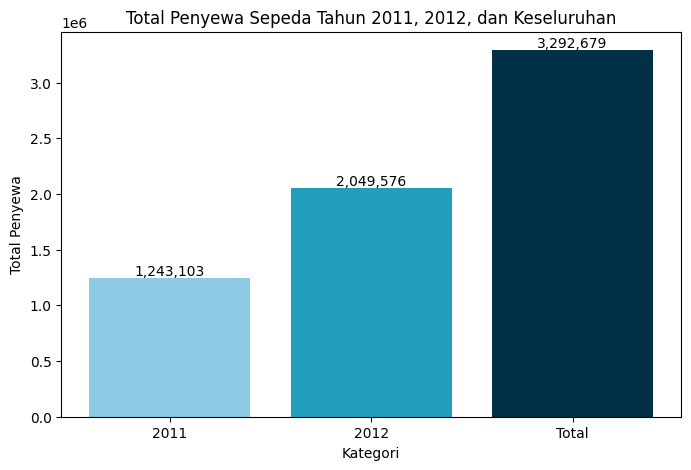

In [17]:
tahun_2011 = data_harian_clean[data_harian_clean['yr'] == 2011]
tahun_2012 = data_harian_clean[data_harian_clean['yr'] == 2012]
total_penyewa_2011 = tahun_2011['cnt'].sum()
total_penyewa_2012 = tahun_2012['cnt'].sum()

# total keseluruhan
total_keseluruhan = total_penyewa_2011 + total_penyewa_2012

# data
kategori = ['2011', '2012', 'Total']
total_penyewa = [total_penyewa_2011, total_penyewa_2012, total_keseluruhan]

# warna (biru muda berbeda + biru tua)
warna = ['#8ecae6', '#219ebc', '#023047']

plt.figure(figsize=(8, 5))
bars = plt.bar(kategori, total_penyewa, color=warna)

plt.xlabel('Kategori')
plt.ylabel('Total Penyewa')
plt.title('Total Penyewa Sepeda Tahun 2011, 2012, dan Keseluruhan')

# tampilkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom'
    )

plt.show()

## 2. Berapa total penyewa casual dan registered pada tahun 2011 dan 2012, serta total keseluruhan?

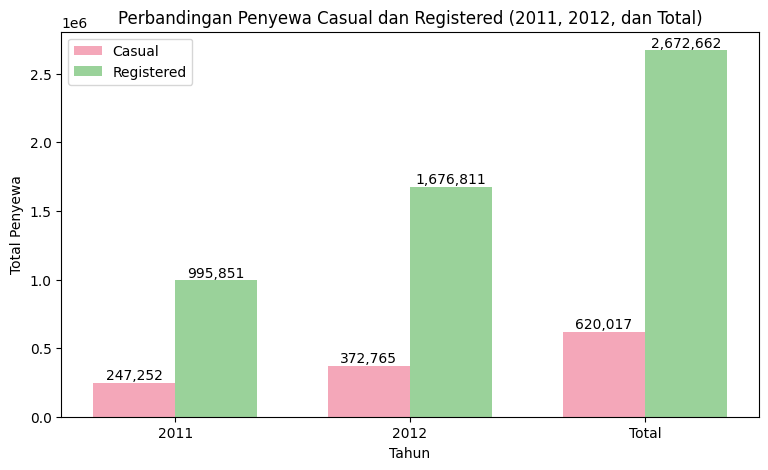

In [18]:
# hitung total
casual_2011 = data_harian_clean[data_harian_clean['yr'] == 2011]['casual'].sum()
registered_2011 = data_harian_clean[data_harian_clean['yr'] == 2011]['registered'].sum()

casual_2012 = data_harian_clean[data_harian_clean['yr'] == 2012]['casual'].sum()
registered_2012 = data_harian_clean[data_harian_clean['yr'] == 2012]['registered'].sum()

casual_total = casual_2011 + casual_2012
registered_total = registered_2011 + registered_2012

# data untuk plot
labels = ['2011', '2012', 'Total']
casual = [casual_2011, casual_2012, casual_total]
registered = [registered_2011, registered_2012, registered_total]

x = np.arange(len(labels))
width = 0.35

# warna
warna_casual = '#f4a7b9'      # merah muda
warna_registered = '#9ad29a'  # hijau muda

# plot
plt.figure(figsize=(9, 5))
bar1 = plt.bar(x - width/2, casual, width, label='Casual', color=warna_casual)
bar2 = plt.bar(x + width/2, registered, width, label='Registered', color=warna_registered)

plt.xlabel('Tahun')
plt.ylabel('Total Penyewa')
plt.title('Perbandingan Penyewa Casual dan Registered (2011, 2012, dan Total)')
plt.xticks(x, labels)
plt.legend()

# tampilkan nilai di atas bar
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )

plt.show()

## 3. Bulan apa dengan total penyewaan sepeda tertinggi dan bagaimana trend pada bulan tersebut?



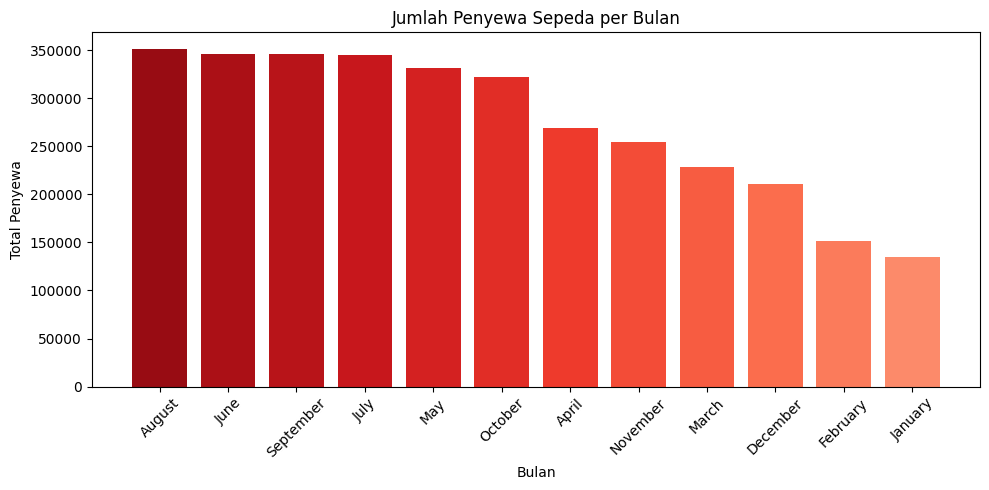

In [19]:
# Melihat Jumlah pengunjung berdasarkan bulan
hasil_bulan = data_harian_clean.groupby("mnth").agg({
    "cnt" : ["sum"]})

hasil_bulan.columns = ['total_cnt']

# urutkan dari terbesar ke terkecil
hasil_bulan_sorted = hasil_bulan.sort_values(by='total_cnt', ascending=False)

# buat gradasi warna merah
colors = plt.cm.Reds(
    np.linspace(0.9, 0.4, len(hasil_bulan_sorted))
)

# plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(
    hasil_bulan_sorted.index,
    hasil_bulan_sorted['total_cnt'],
    color=colors
)

plt.xlabel('Bulan')
plt.ylabel('Total Penyewa')
plt.title('Jumlah Penyewa Sepeda per Bulan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

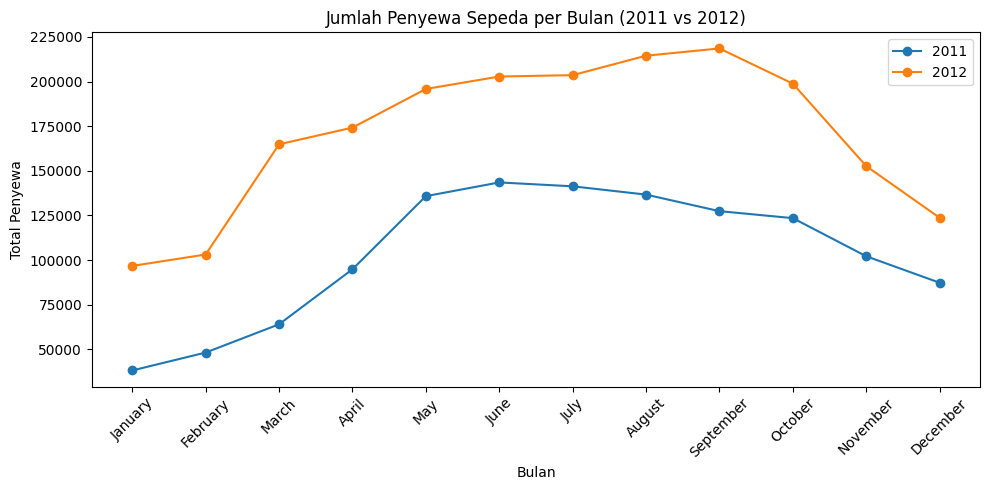

In [20]:
# urutan bulan
urutan_bulan = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# data 2011
bulan_2011 = (
    data_harian_clean[data_harian_clean['yr'] == 2011]
    .groupby('mnth')['cnt']
    .sum()
    .reindex(urutan_bulan)
)

# data 2012
bulan_2012 = (
    data_harian_clean[data_harian_clean['yr'] == 2012]
    .groupby('mnth')['cnt']
    .sum()
    .reindex(urutan_bulan)
)

# plot line chart
plt.figure(figsize=(10, 5))
plt.plot(urutan_bulan, bulan_2011, marker='o', label='2011')
plt.plot(urutan_bulan, bulan_2012, marker='o', label='2012')

plt.xlabel('Bulan')
plt.ylabel('Total Penyewa')
plt.title('Jumlah Penyewa Sepeda per Bulan (2011 vs 2012)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Musim dengan total penyewaan tertinggi?

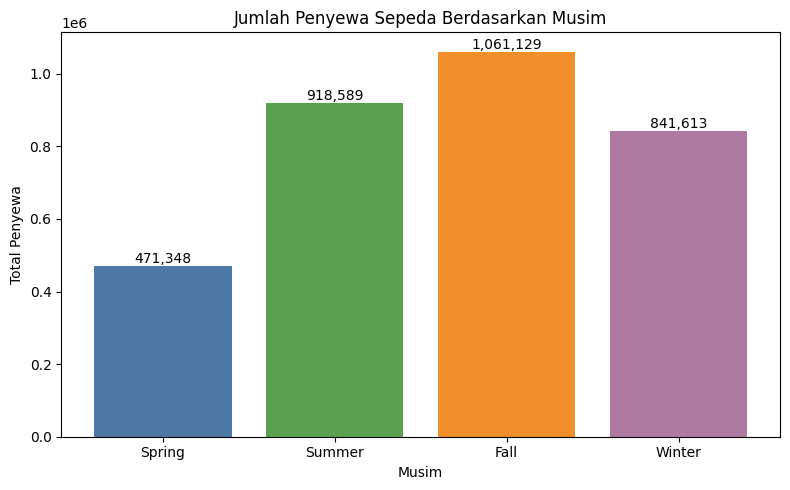

In [21]:
# agregasi
hasil_musim = data_harian.groupby("season")["cnt"].sum().reset_index()

# mapping label musim
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hasil_musim['season'] = hasil_musim['season'].map(season_map)

# plot bar chart
plt.figure(figsize=(8, 5))
warna = ['#4e79a7', '#59a14f', '#f28e2b', '#af7aa1']

bars = plt.bar(
    hasil_musim['season'],
    hasil_musim['cnt'],
    color=warna
)

plt.xlabel('Musim')
plt.ylabel('Total Penyewa')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')

# tampilkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## 5. Pada saat Weekday atau Weekend mana dengan total penyewaan tertinggi?

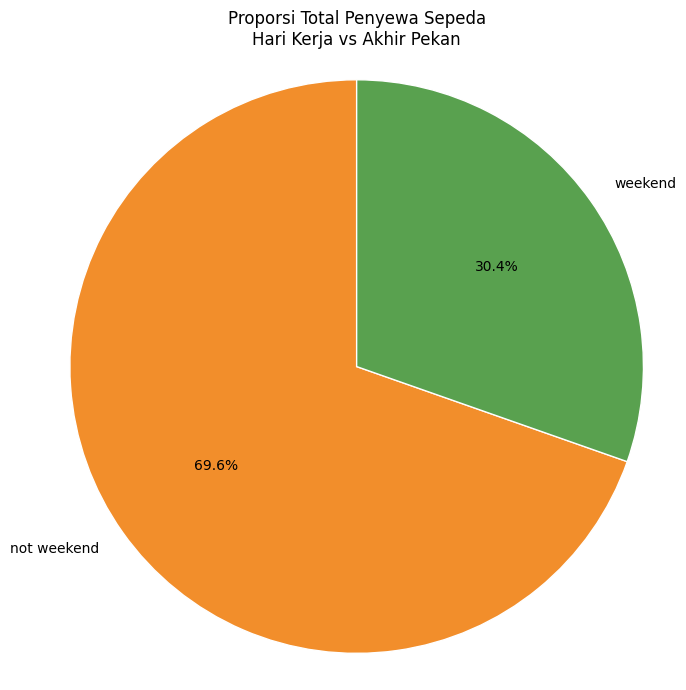

In [22]:
# agregasi
total_workingday = data_harian_clean.groupby("workingday").agg({
    "cnt": "sum"
}).reset_index()

# warna berbeda (aman & tidak bentrok)
warna = ['#f28e2b', '#59a14f']  # oranye & hijau

plt.figure(figsize=(7, 7))

plt.pie(
    total_workingday['cnt'],
    labels=total_workingday['workingday'],
    colors=warna,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Proporsi Total Penyewa Sepeda\nHari Kerja vs Akhir Pekan')
plt.axis('equal')  # agar pie bulat sempurna

plt.tight_layout()
plt.show()

## 6. Apa hari dengan penjualan Tertinggi?

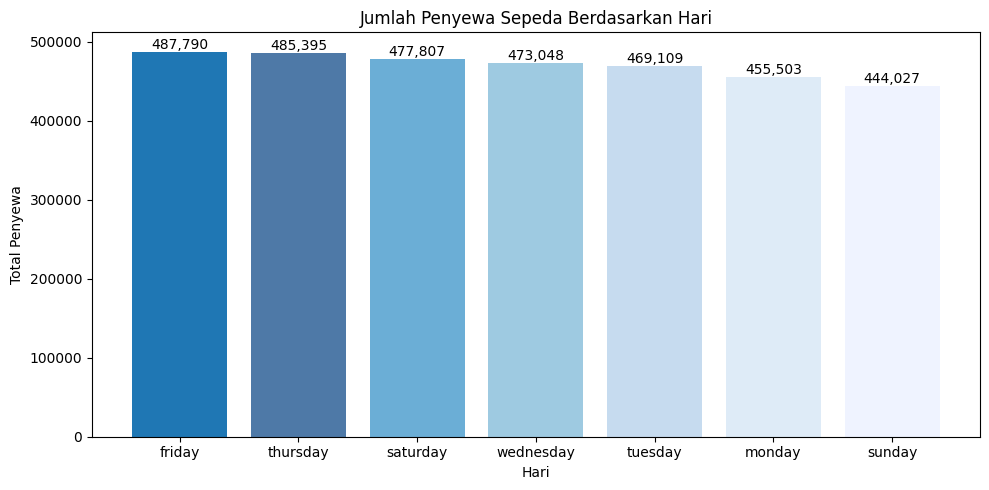

In [23]:
# Melihat Jumlah pengunjung berdasarkan hari
hasil_hari = data_perjam_clean.groupby("weekday").agg({
    "cnt" : ["sum"]}).sort_values(("cnt", "sum"), ascending=False)

hasil_hari.columns = ['total_cnt']
hasil_hari = hasil_hari.reset_index()

# palet warna (gradasi biru aman & rapi)
warna = [
    '#1f77b4', '#4e79a7', '#6baed6',
    '#9ecae1', '#c6dbef', '#deebf7', '#eff3ff'
]

plt.figure(figsize=(10, 5))

bars = plt.bar(
    hasil_hari['weekday'],
    hasil_hari['total_cnt'],
    color=warna[:len(hasil_hari)]
)

plt.xlabel('Hari')
plt.ylabel('Total Penyewa')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Hari')

# tampilkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## 7. Jam Berapa saja yang memiliki total penyewaan tertinggi?

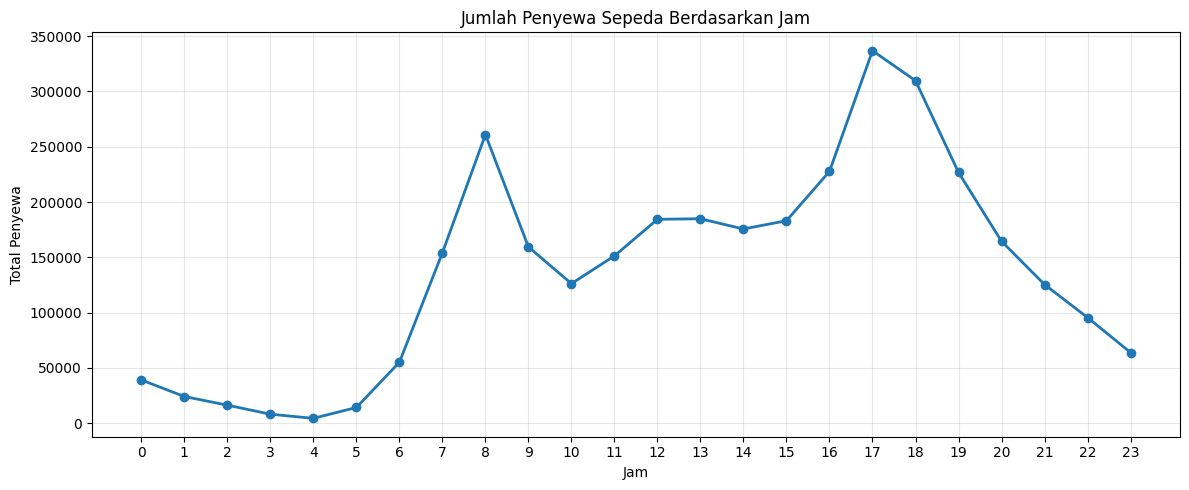

In [24]:
# Melihat Jumlah pengunjung berdasarkan jam
total_jam = data_perjam_clean.groupby("hr").agg({
    "cnt" : ["sum"]}).sort_values(("cnt", "sum"), ascending=False)

total_jam.columns = ['total_cnt']
total_jam = total_jam.reset_index()

# urutkan berdasarkan jam (penting untuk line chart)
total_jam = total_jam.sort_values('hr')

plt.figure(figsize=(12, 5))

plt.plot(
    total_jam['hr'],
    total_jam['total_cnt'],
    marker='o',
    linewidth=2
)

plt.xlabel('Jam')
plt.ylabel('Total Penyewa')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Jam')

plt.xticks(range(0, 24))
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()